In [9]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Load data 
file = 'ex1data1.txt'
data = pd.read_csv(file, header=None, names=['Population','Profit'])

#Add Ones as bias in the data
data.insert(0,'Ones', 1)

print(data.head())

   Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233


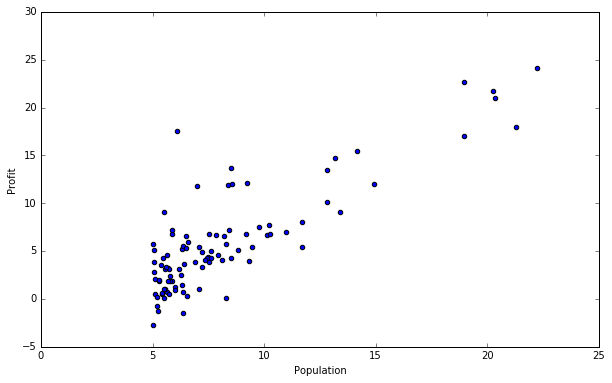

In [11]:
#Visualize the data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,6))
plt.show()

In [12]:
#Select X and y
X = data.iloc[:,0:2]
y = data.iloc[:,2:3]

#Convert X, y, theta into matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [13]:
#Define Cost Function
def computeCost(X,y, theta):
    J = np.power(((X*theta.T)-y),2)
    return np.sum(J)/(2*len(X))

In [14]:
print(computeCost(X,y,theta))

32.0727338775


In [15]:
#prediction calculation
def prediction(X, theta):
    return np.matrix(X*theta.T)

In [16]:
#calculate gradiant descent
def gradientDescent(X, y, theta, learn_rate, iters):
    for i in range(iters):
        error = (X*theta.T) - y
        grad = np.multiply(error, X)
        grad_cost = np.mean(grad, axis = 0)
        theta = theta - learn_rate*grad_cost
    return theta

In [17]:
#assigning the initial training values
learn_rate = 0.01
iters = 1000

In [18]:
final_theta = gradientDescent(X, y, theta, learn_rate, iters)
print('final_theta = '+str(final_theta))

cost = computeCost(X, y, final_theta)
print('cost = '+ str(cost))

final_theta = [[-3.24140214  1.1272942 ]]
cost = 4.51595550308


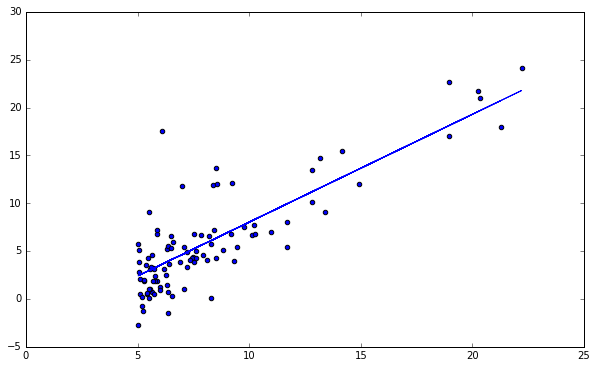

In [20]:
#Plot the line

population = data['Population'].tolist()
profit = data['Profit'].tolist()

plt.subplots(figsize=[10,6])
plt.scatter(population, profit)
plt.plot(population, prediction(X, final_theta))
plt.show()